In [19]:
%pylab inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pymc3 as pm
floatX = "float32"
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


### Building Beta Binomial model

In [58]:
def build_model(alpha, beta, trials, observed):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', alpha, beta)
        likelihood = pm.Binomial('likelihood', n=trials, p=theta, observed=observed)
    return model

def get_trace(model, samples=1000, tune=1000, start=None, progressbar=True):
    with model:
        return pm.sample(samples, tune=tune, start=start, progressbar=progressbar)

## Ejercicio 1:

In [21]:
model_beta_1_1 = build_model(1,1, 6, 6)
model_beta_60_60 = build_model(60,60, 6, 6)
trace_1 = get_trace(model_beta_1_1)
trace_2 = get_trace(model_beta_60_60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1051.28it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1236.23it/s]


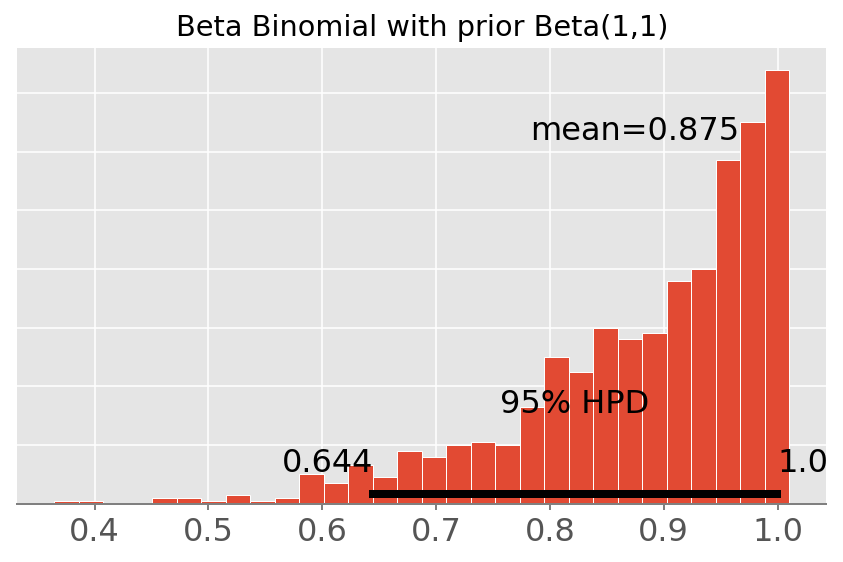

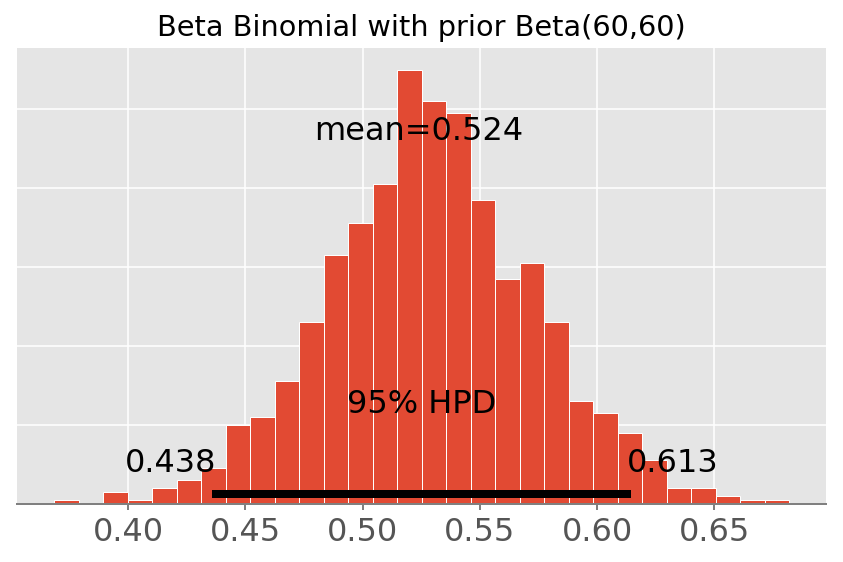

In [22]:
ax1 = pm.plots.plot_posterior(trace_1)
ax2 = pm.plots.plot_posterior(trace_2)    
ax1.set_title('Beta Binomial with prior Beta(1,1)')
ax2.set_title('Beta Binomial with prior Beta(60,60)')

## Ejercicio 2:

In [23]:
map_model_1 = pm.find_MAP(model=model_beta_1_1)
print('With Prior Beta(1,1):')
print('Mean: {}'.format(trace_1['theta'].mean()))
print('MAP: {}'.format(map_model_1['theta']))
map_model_2 = pm.find_MAP(model=model_beta_60_60)
print('With Prior Beta(60,60):')
print('Mean: {}'.format(trace_2['theta'].mean()))
print('MAP: {}'.format(map_model_2['theta']))

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1761.94it/s]


With Prior Beta(1,1):
Mean: 0.874707794442635
MAP: 0.9999984620831801


logp = -1.993, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1996.65it/s]

With Prior Beta(60,60):
Mean: 0.5238784503918916
MAP: 0.5241935483368524


## Ejercicio 3:

In [25]:
super_trace_1 = get_trace(model_beta_1_1, samples=20000, tune=2000, start=map_model_1)
super_trace_2 = get_trace(model_beta_60_60, samples=20000, tune=2000, start=map_model_2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 21977/22000 [00:18<00:00, 1252.77it/s]/Users/chcuneo/ThePost/Personal/Facu/p3venv/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 22000/22000 [00:18<00:00, 1188.91it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 22000/22000 [00:18<00:00, 1176.26it/s]


In [47]:
print('Prediccion tirada 6 monedas:')
with model_beta_1_1:
    print('Prior beta(1,1): {} caras de 6'.format(pm.sample_ppc(super_trace_1, samples=1)['likelihood'][0]))
with model_beta_60_60:
    print('Prior beta(60,60): {} caras de 6'.format(pm.sample_ppc(super_trace_2, samples=1)['likelihood'][0]))

100%|██████████| 1/1 [00:00<00:00, 1494.76it/s]

Prediccion tirada 6 monedas:
Prior beta(1,1): 5 caras de 6
Prior beta(60,60): 3 caras de 6


## Ejercicio 4:

### Building models

In [48]:
model_beta_1_1_20 = build_model(1,1, 20, 20)
model_beta_1_1_3 = build_model(1,1, 3, 3)
model_beta_60_60_20 = build_model(60,60, 20, 20)
model_beta_60_60_3 = build_model(60,60, 3, 3)
trace_1_1_20 = get_trace(model_beta_1_1_20)
trace_1_1_3 = get_trace(model_beta_1_1_3)
trace_60_60_20 = get_trace(model_beta_60_60_20)
trace_60_60_3 = get_trace(model_beta_60_60_3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1166.04it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1244.13it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:02<00:00, 829.96it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1142.42it/s]


### Posteriors

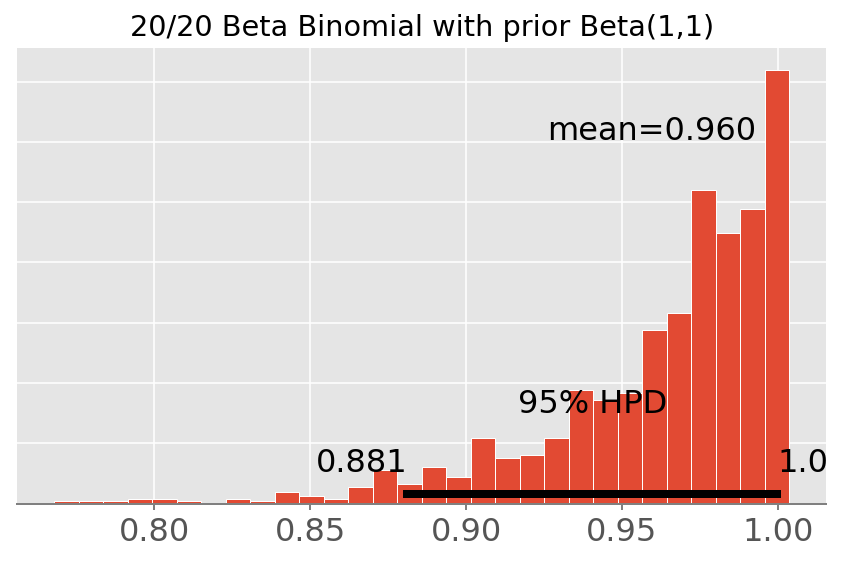

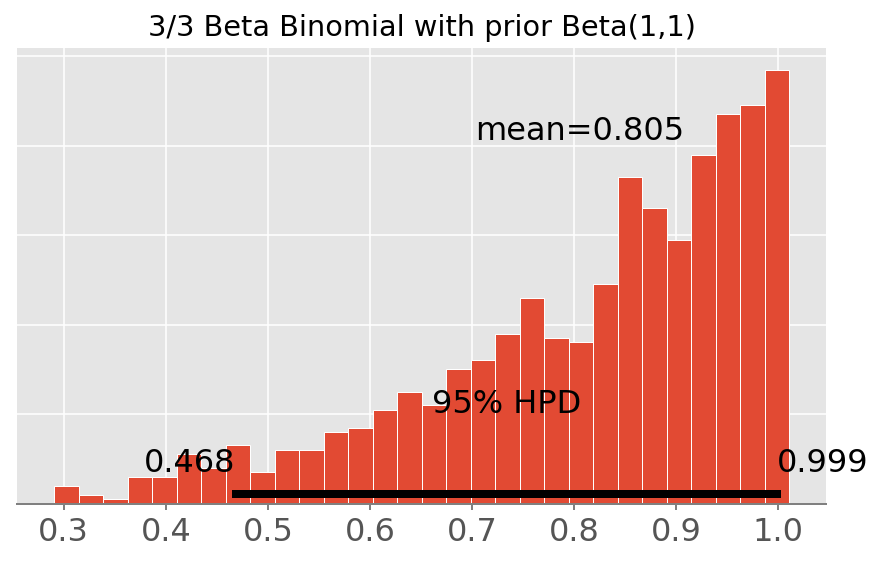

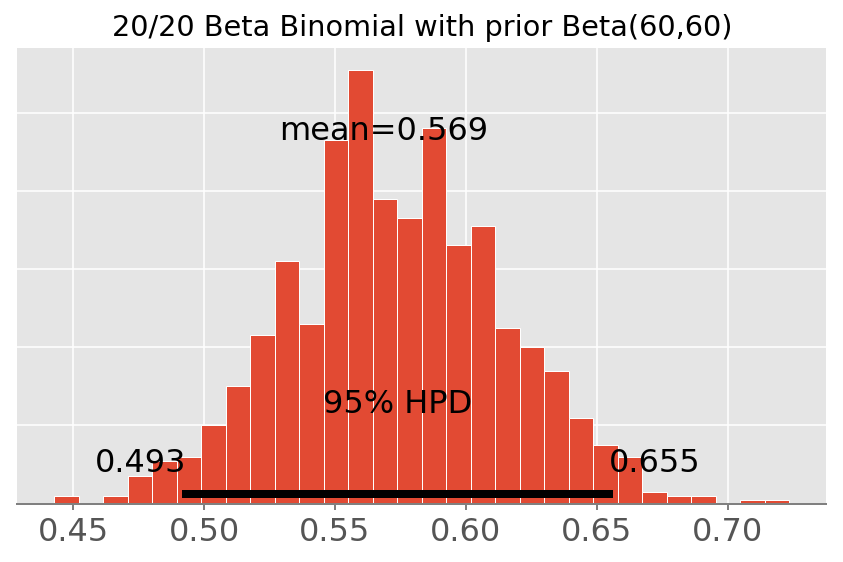

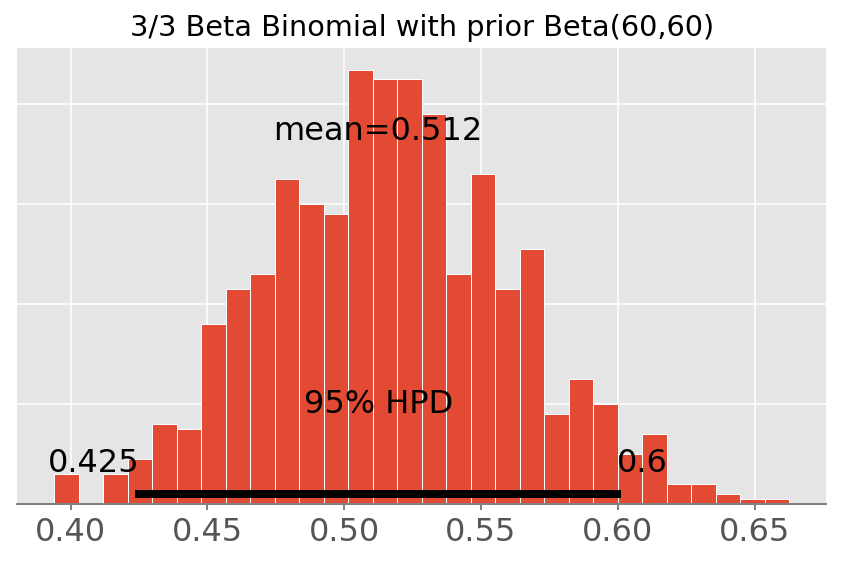

In [49]:
ax1 = pm.plots.plot_posterior(trace_1_1_20)
ax2 = pm.plots.plot_posterior(trace_1_1_3)    
ax3 = pm.plots.plot_posterior(trace_60_60_20)
ax4 = pm.plots.plot_posterior(trace_60_60_3)    
ax1.set_title('20/20 Beta Binomial with prior Beta(1,1)')
ax2.set_title('3/3 Beta Binomial with prior Beta(1,1)')
ax3.set_title('20/20 Beta Binomial with prior Beta(60,60)')
ax4.set_title('3/3 Beta Binomial with prior Beta(60,60)')

### MAP and Mean

In [52]:
def print_map_mean(mapp, trace, name):
    print('With Prior {}:'.format(name))
    print('Mean: {}'.format(trace['theta'].mean()))
    print('MAP: {}'.format(mapp['theta']))
    print()
    
map_model_1_1_20 = pm.find_MAP(model=model_beta_1_1_20)
map_model_1_1_3 = pm.find_MAP(model=model_beta_1_1_3)
map_model_60_60_20 = pm.find_MAP(model=model_beta_60_60_20)
map_model_60_60_3 = pm.find_MAP(model=model_beta_60_60_3)
print_map_mean(map_model_1_1_20, trace_1_1_20, 'Beta(1,1) 20/20')
print_map_mean(map_model_1_1_3, trace_1_1_3, 'Beta(1,1) 3/3')
print_map_mean(map_model_60_60_20, trace_60_60_20, 'Beta(60,60) 20/20')
print_map_mean(map_model_60_60_3, trace_60_60_3, 'Beta(60,60) 3/3')

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 2553.04it/s]
logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 2415.12it/s]
logp = -11.697, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1770.87it/s]
logp = 0.086436, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 3040.82it/s]

With Prior Beta(1,1) 20/20:
Mean: 0.9595371766446381
MAP: 0.9999996155210419

With Prior Beta(1,1) 3/3:
Mean: 0.8053579211135378
MAP: 0.999996924163579

With Prior Beta(60,60) 20/20:
Mean: 0.5687645664677362
MAP: 0.5724637662218675

With Prior Beta(60,60) 3/3:
Mean: 0.5122834114605317
MAP: 0.5123966942124236



### Prediction

In [53]:
super_trace_1_1_3 = get_trace(model_beta_1_1_3, samples=20000, tune=2000, start=map_model_1_1_3)
super_trace_60_60_3 = get_trace(model_beta_60_60_3, samples=20000, tune=2000, start=map_model_60_60_3)
super_trace_1_1_20 = get_trace(model_beta_1_1_20, samples=20000, tune=2000, start=map_model_1_1_20)
super_trace_60_60_20 = get_trace(model_beta_60_60_20, samples=20000, tune=2000, start=map_model_60_60_20)

print('Prediccion tirada 3 monedas:')
with model_beta_1_1_3:
    print('Prior 3/3 beta(1,1): {} caras de 3'.format(pm.sample_ppc(super_trace_1_1_3, samples=1)['likelihood'][0]))
with model_beta_60_60_3:
    print('Prior 3/3 beta(60,60): {} caras de 3'.format(pm.sample_ppc(super_trace_60_60_3, samples=1)['likelihood'][0]))

print('Prediccion tirada 20 monedas:')
with model_beta_1_1_20:
    print('Prior 20/20 beta(1,1): {} caras de 20'.format(pm.sample_ppc(super_trace_1_1_20, samples=1)['likelihood'][0]))
with model_beta_60_60_20:
    print('Prior 20/20 beta(60,60): {} caras de 20'.format(pm.sample_ppc(super_trace_60_60_20, samples=1)['likelihood'][0]))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 22000/22000 [00:16<00:00, 1297.61it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 22000/22000 [00:23<00:00, 918.30it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 21975/22000 [00:17<00:00, 1309.00it/s]/Users/chcuneo/ThePost/Personal/Facu/p3venv/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 71 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 22000/22000 [00:17<00:00, 1270.83it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1/1 [00:00<00:00, 1689.21it/s]

Prediccion tirada 3 monedas:
Prior 3/3 beta(1,1): 3 caras de 3
Prior 3/3 beta(60,60): 2 caras de 3
Prediccion tirada 20 monedas:
Prior 20/20 beta(1,1): 17 caras de 20
Prior 20/20 beta(60,60): 10 caras de 20


### Conclusion

Lo que esta definiendo la distribucion beta en nuestro modelo es la probabilidad de las probabilidades a priori. Lo que se puede notar de los graficos, es que la distribucion Beta con alpha y gamma 1 luce mucho como una geometrica (al revez, pero la misma forma) por lo tanto le va a decir al modelo que nosotros creemos bastante fuerte que la moneda esta cargada. No asi la distribucion Beta con alpha y gamma 60 que parece mas una gausseana, con un pico fuerte en 0.5 y con la distribución practicamente dentro del rango 0.40-0.65, quiere decir que en este caso representa que creemos fuertemente que la moneda no esta cargada. 
Eso se puede ver muy claramente en los graficos, ya que en el caso de la priori Beta(1,1), aunque tiremos 3 monedas nomas o 20, igual la probabilidad a posteriori nos concluye que la moneda esta muy cargada. No asi en el Beta(60,60) que aunque tiremos 20 monedas y salgan estas 20 cara, el modelo nos hace confiar que la moneda no esta muy cargada.

El modelo es confiable, solo necesitamos una distribucion para nuestra probabilidad a priori mas acorde con la realidad. Pienso que es confiable porque tiene sentido utilizar la creencia y conocimiento previo para generar un modelo mas robusto, y que los primeros datos no nos impacten fuertemente en los resultados sin sentido.

## Ejercicio 5:

Teniendo en cuenta la conclusion y reflexion anterior, llegue a la conclusion que, para que este modelo se ajuste mas a la realidad, utilizando la intuición propia, lo que queremos es un modelo que mas o menos a la altura de la 6ta cara consecutiva ya este dudando significativamente de la imparcialidad de la moneda.
Para esto vamos a buscar un alpha y gamma para la probabilidad a priori Beta que nos de este resultado. 
Dudar significativamente de la imparcialidad lo tomo como tener al menos una probabilidad de 0.7 de que salga cara, por lo tanto busco algun alpha y gamma que de mayor a 0.7 en la 6ta tirada pero menos que 0.7 en la 5ta.

In [65]:
for guess in range(1,60):
    model_5 = build_model(guess,guess, 5, 5)
    model_6 = build_model(guess,guess, 6, 6)
    trace_5 = get_trace(model_5)
    trace_6 = get_trace(model_6)
    map_model_5 = pm.find_MAP(model=model_5)
    map_model_6 = pm.find_MAP(model=model_6)
    print('Guess {}: throw5={} throw6={}'.format(guess, map_model_5['theta'], map_model_6['theta']))
    if map_model_5['theta'] < 0.7 and map_model_6['theta'] >= 0.7:
        print('Alpha & Gamma should be: {}'.format(guess))
        break


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1095.73it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1150.52it/s]
logp = -0.0019693, ||grad|| = 0.0019689: 100%|██████████| 20/20 [00:00<00:00, 3544.13it/s]
logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2168.94it/s]


Guess 1: throw5=0.9999984620831801 throw6=0.9999984620831801


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:02<00:00, 974.97it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1118.95it/s]
logp = -3.0603, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 526.84it/s]
logp = -3.7534, ||grad|| = 3: 100%|██████████| 8/8 [00:00<00:00, 2443.52it/s]


Guess 2: throw5=0.857142841107735 throw6=0.8749998879345258


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:02<00:00, 760.23it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1137.32it/s]
logp = -2.8371, ||grad|| = 2.5: 100%|██████████| 7/7 [00:00<00:00, 2282.35it/s]
logp = -3.5303, ||grad|| = 3: 100%|██████████| 7/7 [00:00<00:00, 1794.85it/s]


Guess 3: throw5=0.7777777708576501 throw6=0.7999999031850725


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1091.83it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1046.19it/s]
logp = -2.683, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1908.53it/s]
logp = -3.3761, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 2514.57it/s]


Guess 4: throw5=0.7272727288109787 throw6=0.7499996941800062


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1175.83it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1025.88it/s]
logp = -2.5652, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 2657.15it/s]
logp = -3.2583, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 2512.56it/s]

Guess 5: throw5=0.6923084406166831 throw6=0.7142858152587334
Alpha & Gamma should be: 5


Llegamos a la conclusion que la distribucion de probabilidades a priori debe ser Beta(5,5). Por ultimo quiero ver los graficos y datos correspondientes a este modelo.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:02<00:00, 958.63it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:01<00:00, 1062.48it/s]
logp = -0.5015, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 1349.52it/s]


With Prior Beta(5,5) 5/10:
Mean: 0.505612746422294
MAP: 0.5



logp = -2.2243, ||grad|| = 3: 100%|██████████| 7/7 [00:00<00:00, 2720.55it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


With Prior Beta(5,5) 8/10:
Mean: 0.6488045596437644
MAP: 0.6666666671652423



100%|██████████| 22000/22000 [00:16<00:00, 1316.97it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1/1 [00:00<00:00, 1715.46it/s]


Prediccion tirada 10 monedas 5 caras:
beta(5,5): 6 caras de 10
Prediccion tirada 10 monedas 8 caras:
beta(5,5): 7 caras de 10


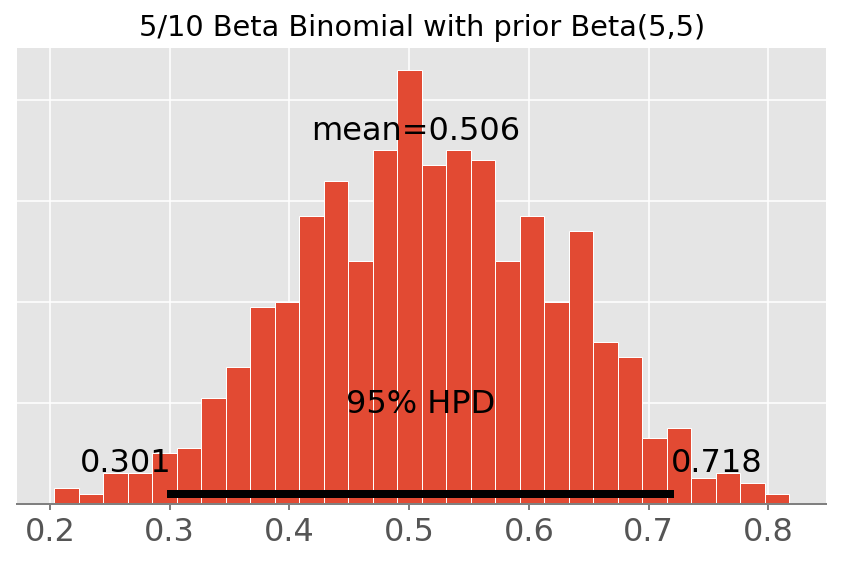

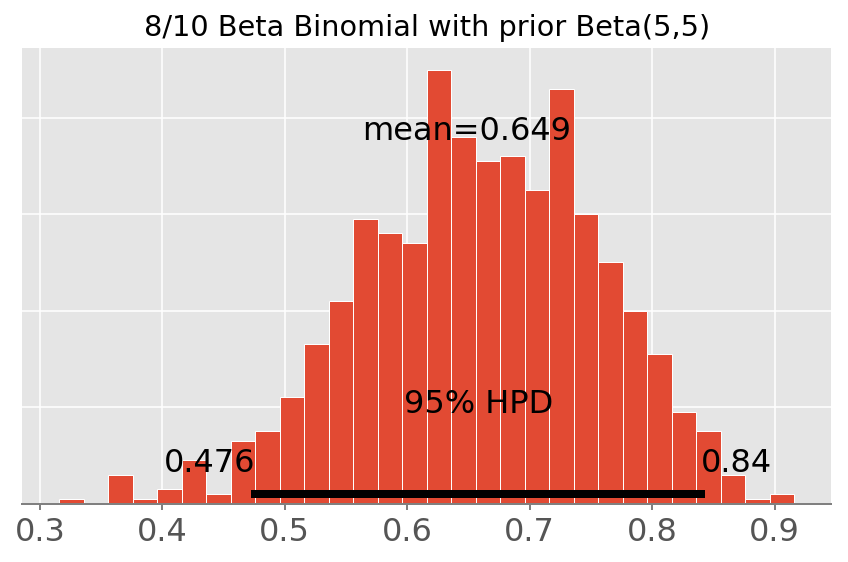

In [67]:
model_5_5_10_5 = build_model(5,5, 10, 5)
trace_5_5_10_5 = get_trace(model_5_5_10_5)
model_5_5_10_8 = build_model(5,5, 10, 8)
trace_5_5_10_8 = get_trace(model_5_5_10_8)

ax555 = pm.plots.plot_posterior(trace_5_5_10_5)    
ax555.set_title('5/10 Beta Binomial with prior Beta(5,5)')
ax558 = pm.plots.plot_posterior(trace_5_5_10_8)    
ax558.set_title('8/10 Beta Binomial with prior Beta(5,5)')

map_model_5_5_10_5 = pm.find_MAP(model=model_5_5_10_5)
print_map_mean(map_model_5_5_10_5, trace_5_5_10_5, 'Beta(5,5) 5/10')
map_model_5_5_10_8 = pm.find_MAP(model=model_5_5_10_8)
print_map_mean(map_model_5_5_10_8, trace_5_5_10_8, 'Beta(5,5) 8/10')

super_trace_5_5_10_5 = get_trace(model_5_5_10_5, samples=20000, tune=2000, start=map_model_5_5_10_5)
super_trace_5_5_10_8 = get_trace(model_5_5_10_8, samples=20000, tune=2000, start=map_model_5_5_10_8)

print('Prediccion tirada 10 monedas 5 caras:')
with model_5_5_10_5:
    print('beta(5,5): {} caras de 10'.format(pm.sample_ppc(super_trace_5_5_10_5, samples=1)['likelihood'][0]))
print('Prediccion tirada 10 monedas 8 caras:')
with model_5_5_10_8:
    print('beta(5,5): {} caras de 10'.format(pm.sample_ppc(super_trace_5_5_10_8, samples=1)['likelihood'][0]))

Estoy satisfecho con el resultado ya que en el caso que de 10 tiradas 5 son caras el modelo confia que la moneda no esta cargada, y en el de 8 caras tiende significativamente a dudar de su imparcialidad.